# 最終問題 偽の惑星問題: 解法例

## 最終問題の内容は・・・

Dr. リョウコがクリアしなければならない領域（ボード）は16個あり、それぞれに「惑星パズル」の惑星に対応する6つのノイズクラスターがあります。16個の領域（ボード）の中に、3回のレーザーショットではノイズクラスターをクリアできない領域（ボード）が1つだけあります！ 第1週と第2週で学習したグローバーのアルゴリズムを使用して、その領域（ボード）を見つけてください。

- ノイズクラスターはグリッドに配置されます。
- レーザービームを垂直または水平に発射することにより、すべてのノイズクラスターを破壊することが目的です。
- ボードのサイズは4 $\times$ 4です。
- 各ボードのノイズクラスターの個数は6で、発射できるレーザーショットの回数は3です。
- それぞれの問題ボードは、0、1、2回のレーザーショットでは解けません。

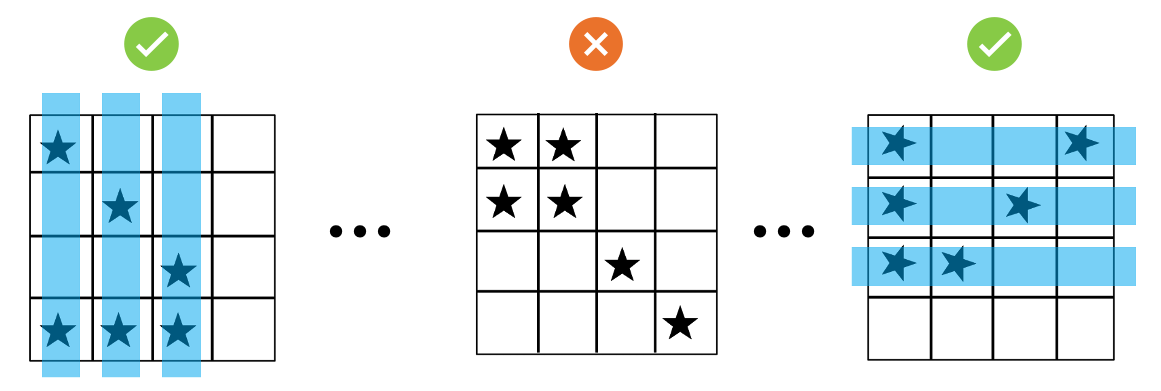

In [1]:
from IPython.display import Image, display
Image('ex_3_overview.png')

In [2]:
problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

In [3]:
def draw_asteroids(problem):
    for i in range(4):
        for j in range(4):
            if [str(i),str(j)] in problem:
                print("X ", end='')
            else:
                print(". ", end='')
        print("")

for i, problem in enumerate(problem_set):
    print("--", i,"---")
    draw_asteroids(problem)

-- 0 ---
. . X . 
X . X X 
X . . . 
. . . X 
-- 1 ---
X X . . 
. . X . 
. . X . 
X . . X 
-- 2 ---
X . . . 
. X . X 
X . . . 
. . X X 
-- 3 ---
X X . . 
. X . X 
. . . . 
. . X X 
-- 4 ---
. . X . 
X . . X 
X . . . 
. . X X 
-- 5 ---
. . . . 
. X X . 
X X . . 
. X . X 
-- 6 ---
. . X X 
. . X . 
X X . . 
. . . X 
-- 7 ---
X . . X 
. . X . 
. . X X 
X . . . 
-- 8 ---
. . . X 
. X X . 
X X . . 
. . . X 
-- 9 ---
X X . . 
. . . X 
. X . X 
X . . . 
-- 10 ---
. X . X 
. . X X 
X . . . 
. . X . 
-- 11 ---
X . . . 
. . . X 
X X . X 
. X . . 
-- 12 ---
. X X . 
X . X . 
. . X X 
. . . . 
-- 13 ---
. . . X 
X . . X 
. X X . 
X . . . 
-- 14 ---
. . X X 
. . X . 
. . . X 
X X . . 
-- 15 ---
. X . . 
X . X . 
. . X . 
X X . . 


## 解答例

この演習を解決するための賢い方法はたくさんあります。 実際、上位3人の参加者は、それぞれコードで異なるアルゴリズムを使用しています。 これらのアプローチに興味がある方は、[上位の参加者のnotebook](https://github.com/qiskit-community/IBMQuantumChallenge2020/tree/main/submissions)を参照してください。

このnotebookでは、その中の2つのアプローチを紹介します。 1つ目のアプローチは、問題を頂点被覆問題に変換し、[Dr. リョウコのヒント](https://github.com/qiskit-community/IBMQuantumChallenge2020/blob/main/hints/hint_3.pdf)に書かれているように、ダブル・グローバーを使用して頂点被覆問題を解くことに基づいています。 2つ目のアプローチは、解けないボードの特徴を使って問題を解決します。**2つ目のアプローチの方がシンプルで分かりやすいので、もし1つ目のアプローチが難しいと感じた場合、スキップして2つ目のアプローチのセクションを読んでください。**（これらの解法は、唯一の正解ではなく、文字通り、例であることを忘れないでください。）

### アプローチ1：ダブル・グローバーで頂点被覆問題を解く

このアプローチでは、問題を頂点被覆問題に変換してから、演習2-bで行ったように、ダブル・グローバーを使用して頂点被覆問題を解きます。 この解法は、一般的で素朴なアプローチです。 2番目のアプローチよりもコストがかかります。

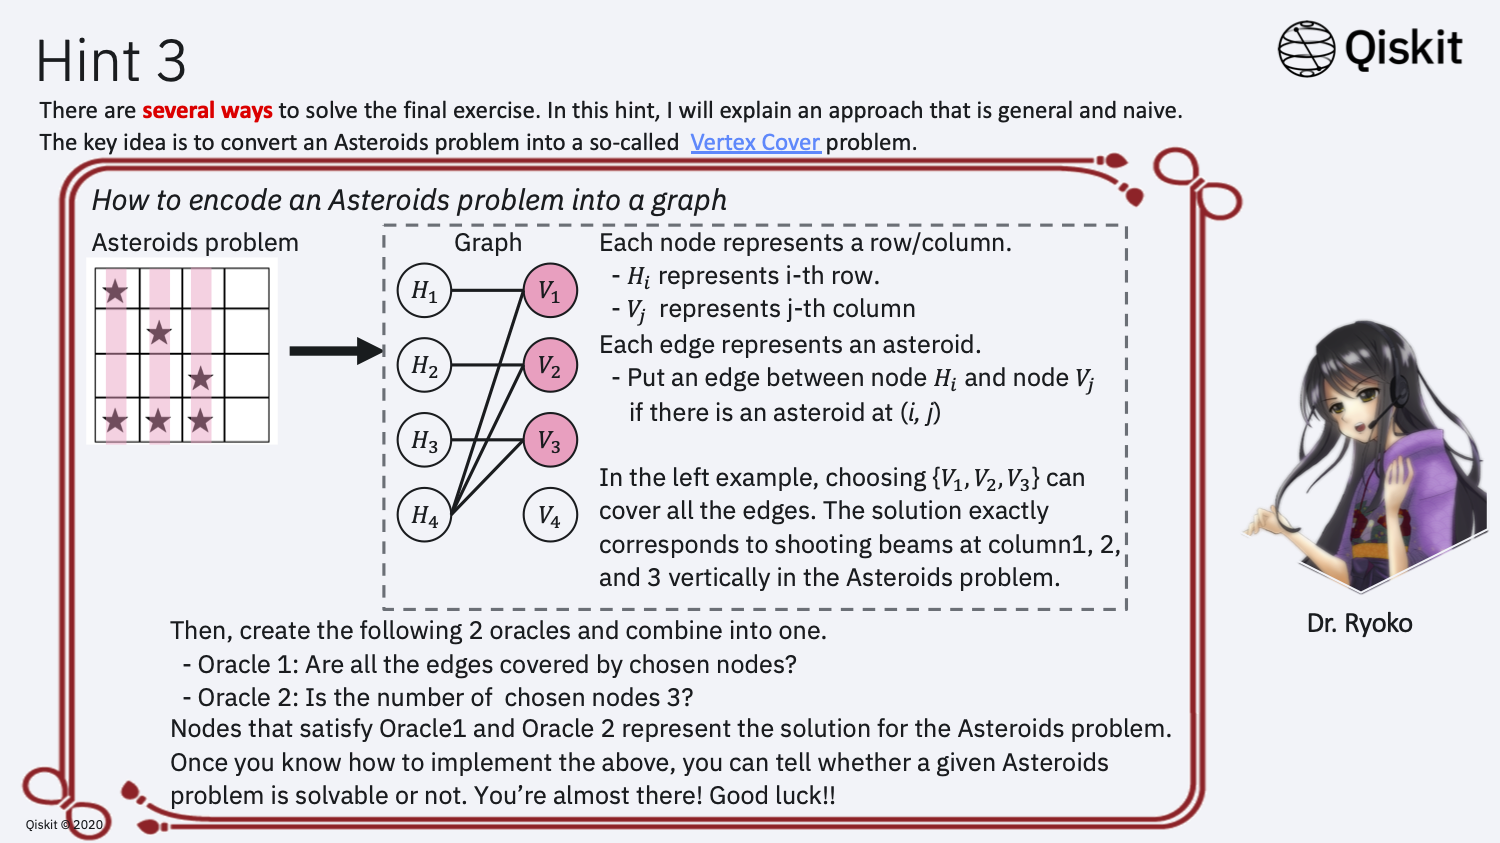

In [4]:
from IPython.display import Image, display
Image('Hint_3.png')

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

この1つ目のアプローチでは、次の2つのオラクルが必要です。

1. すべてのエッジ（辺）が選択したノード（頂点）でカバーされているかどうか
2. 選択したノード（頂点）の数が3個かどうか

両方のオラクルは、カバーされたエッジ（辺）/選択されたノード（頂点）の数をそれぞれカウントする必要があります。そのために、Week2-bに使用されたカウンターを使用して「1」を足していきます。 問題セットのボードは、0、1、2ショットのレーザーでは解けないことに注意してください。

In [6]:
# define a counter used in week2-b
def counter(qc, qr, auxiliary):
    qc.mcx(qr[0:3], qr[3], auxiliary)
    qc.ccx(qr[0], qr[1], qr[2])
    qc.cx(qr[0], qr[1])

def reverse_counter(qc, qr, auxiliary):
    qc.cx(qr[0], qr[1])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.mcx(qr[0:3], qr[3], auxiliary)

#### グレイコード順で問題を読み込む

問題の読み込みのコストを削減するための小さなトリックがあります。 秘訣は、問題をロードする順序です。 通常の昇順ではなく、[グレイコード](https://ja.wikipedia.org/wiki/%E3%82%B0%E3%83%AC%E3%82%A4%E3%82%B3%E3%83%BC%E3%83%89) の順序で問題をロードします。 そうすることで、mcxゲートの前後で使用されるXゲートの数を減らすことができます。

次の回路は、昇順での問題をロードする例です。 説明を簡単にするために、読み込み部品を表すために単一のmcxゲートを使用したことに注意してください。 実際に問題を読み込むためには適切な回路を構築する必要があります。

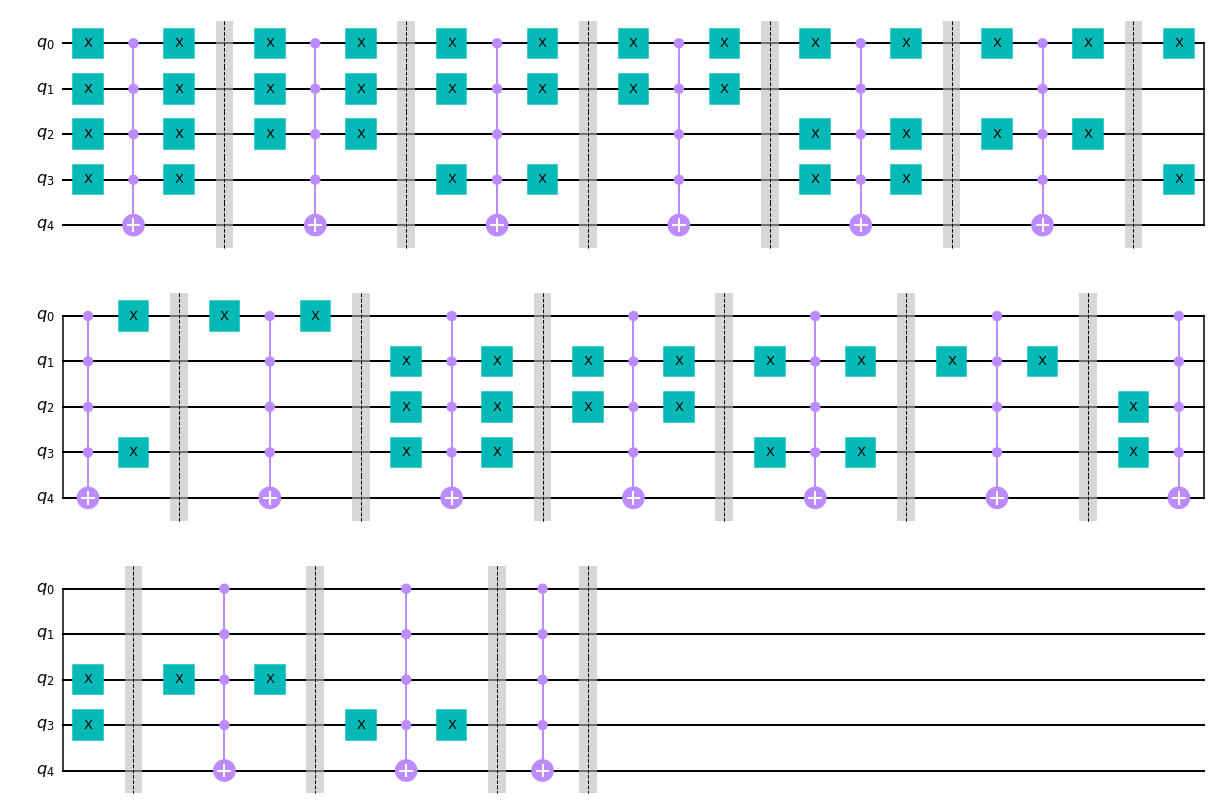

In [7]:
# An example of the ascending_order_qc
ascending_order_qc = QuantumCircuit(5)
for i in range(16):
    for k in range(4):
        if not i & (1<<k):
            ascending_order_qc.x(3-k)
    ascending_order_qc.mcx([0, 1, 2, 3], 4)
    for k in range(4):
        if not i & (1<<k):
            ascending_order_qc.x(3-k)
    ascending_order_qc.barrier()
ascending_order_qc.draw('mpl')

次の回路は、グレイコード順でのロードの問題の例です。 ご覧のとおり、グレイコード順に問題をロードすると、必要なXゲートの数が少なくなります。 上記の例と同様に、簡単化のため、単一のmcxゲートを使用してロードの部分を表していることに注意してください。

In [8]:
gray_code_order = ['1111', '1110', '1010', '1011', '1001', '1000', '0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101']
[int(i, 2)for i in gray_code_order]

[15, 14, 10, 11, 9, 8, 0, 1, 3, 2, 6, 7, 5, 4, 12, 13]

In [9]:
def insert_x_dif(qc, address, cur, last):
    for i in range(4):
        if cur[i] != last[i]:
            qc.x(address[i])

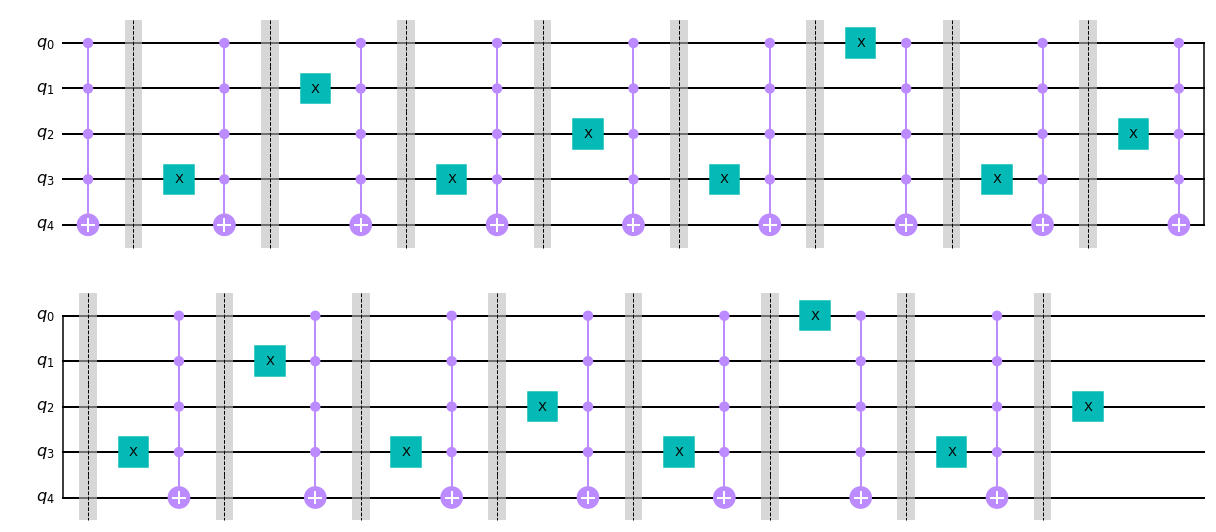

In [10]:
gray_code_order_qc = QuantumCircuit(5)
last = '1111'
address = [0, 1, 2, 3]
for k in range(16):
    cur = gray_code_order[k]
    insert_x_dif(gray_code_order_qc, address, cur, last)
    gray_code_order_qc.mcx([0, 1, 2, 3], 4)
    gray_code_order_qc.barrier()
    last = cur
insert_x_dif(gray_code_order_qc, address, '1111', last)
gray_code_order_qc.draw('mpl')

**この最初のアプローチでは、各レーザービームをノード（量子回路の量子ビット）にエンコードします。 また、各ノイズクラスターをエッジ（量子回路の量子ゲート）にエンコードします。 **

#### Oracle 1：すべてのエッジが選択されたノードでカバーされているかどうか？

頂点被覆については、エッジの端のノードのORを取ることで、エッジが覆われているかどうかを確認できます。 垂直/水平のレーザービームとノイズクラスターが、それぞれノードとエッジにエンコードされていることに注意してください。したがって、ORを取ることは、ノイズクラスターが垂直または水平のレーザービームの1つでカバーされていることを確認することに対応します。 

たとえば、ノイズクラスター['0', '1'] は、ORを取ることにより、最初の行で水平レーザービーム、または2番目の列で垂直レーザービームでカバーされます（インデックスは0から始まることに注意してください）。

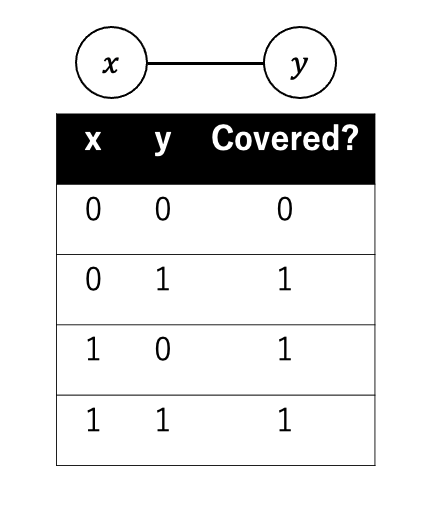

In [11]:
from IPython.display import Image, display
Image('OR_cover_edge.png')

ORゲートは、量子回路に2つのCXゲートと1つのCCXゲートを使用して次のように実装できます。

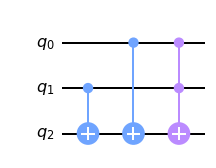

In [12]:
# An OR gate implementation
# x, y, and covered are represented by qubit 0, 1, and 2, respectively. 
or_qc = QuantumCircuit(3)
or_qc.cx(1, 2)
or_qc.cx(0, 2)
or_qc.ccx(0, 1, 2)
or_qc.draw('mpl')

これで、エッジ（ノイズクラスター）がカバーされているかどうかを確認できます。 複数のエッジの場合、カウンターを使用して、カバーされているエッジの数をカウントします。カバーされるエッジの数がエッジの総数と等しい場合、すべてのエッジがカバーされていると言えます。 
 
つまり、6つのエッジ（ノイズクラスター）すべてが覆われているかどうかを、カウンターとORゲートを使って知ることができます。 それでは、最初のオラクルを作成してチェックしましょう。

In [13]:
def vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary):
    gray_code_order = ['1111', '1110', '1010', '1011', '1001', '1000', '0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101']

    last = '1111'
    # Load problems in the Gray code order.
    for i in range(6):
        for k in range(16):
            cur = gray_code_order[k]
            insert_x_dif(qc, address, cur, last)
            problem = problem_set[int(cur, 2)]
            row = int(problem[i][0])
            column = int(problem[i][1])

            # Check whether corresponded vertical (or horizontal) laser covers the noise cluster
            # To prevent canceling out for the case both corresponded lasers covers the noise cluster, we apply an OR function. 
            h_control=address[:]+[lasers[row]]
            v_control=address[:]+[lasers[column+4]]
            vh_control=address[:]+[lasers[column+4]]+[lasers[row]]

            qc.mcx(v_control, counter_reg[0], auxiliary)
            qc.mcx(h_control, counter_reg[0], auxiliary)
            qc.mcx(vh_control, counter_reg[0], auxiliary)
            last = cur

        # Use a counter to count the number of the covered noise clusters.
        counter(qc, counter_reg[:], auxiliary)
        
        for k in range(16):
            cur = gray_code_order[k]
            insert_x_dif(qc, address, cur, last)
            problem = problem_set[int(cur, 2)]
            row = int(problem[i][0])
            column = int(problem[i][1])

            # Check whether corresponded vertical (or horizontal) laser covers the noise cluster
            # To prevent canceling out for the case both corresponded lasers covers the noise cluster, we apply an OR function. 
            h_control=address[:]+[lasers[row]]
            v_control=address[:]+[lasers[column+4]]
            vh_control=address[:]+[lasers[column+4]]+[lasers[row]]

            qc.mcx(v_control, counter_reg[0], auxiliary)
            qc.mcx(h_control, counter_reg[0], auxiliary)
            qc.mcx(vh_control, counter_reg[0], auxiliary)
            last = cur


    #Store 1 at output[0] if the calculation result is 6 (means that all the noise clusters are is covered)
    qc.x(counter_reg[1])
    qc.mcx(counter_reg[1:], output[0], auxiliary)
    qc.x(counter_reg[1])

    for i in range(6):
        for k in range(16):
            cur = gray_code_order[k]
            insert_x_dif(qc, address, cur, last)
            problem = problem_set[int(cur, 2)]
            row = int(problem[i][0])
            column = int(problem[i][1])

            # Check whether corresponded vertical (or horizontal) laser covers the noise cluster
            # To prevent canceling out for the case both corresponded lasers covers the noise cluster, we apply an OR function. 
            h_control=address[:]+[lasers[row]]
            v_control=address[:]+[lasers[column+4]]
            vh_control=address[:]+[lasers[column+4]]+[lasers[row]]

            qc.mcx(v_control, counter_reg[0], auxiliary)
            qc.mcx(h_control, counter_reg[0], auxiliary)
            qc.mcx(vh_control, counter_reg[0], auxiliary)
            last = cur

        # Use a counter to count the number of the covered noise clusters.
        reverse_counter(qc, counter_reg[:], auxiliary)

        for k in range(16):
            cur = gray_code_order[k]
            insert_x_dif(qc, address, cur, last)
            problem = problem_set[int(cur, 2)]
            row = int(problem[i][0])
            column = int(problem[i][1])

            # Check whether corresponded vertical (or horizontal) laser covers the noise cluster
            # To prevent canceling out for the case both corresponded lasers covers the noise cluster, we apply an OR function. 
            h_control=address[:]+[lasers[row]]
            v_control=address[:]+[lasers[column+4]]
            vh_control=address[:]+[lasers[column+4]]+[lasers[row]]

            qc.mcx(v_control, counter_reg[0], auxiliary)
            qc.mcx(h_control, counter_reg[0], auxiliary)
            qc.mcx(vh_control, counter_reg[0], auxiliary)
            last = cur
        
    insert_x_dif(qc, address, '1111', last)

上記のオラクルを使用すると、すべてのノードがカバーされているかどうかを確認できます。

#### Oracle 2：選択されたノードの数が3かどうか

選択されたノードの数が3かどうかを確認するためにもカウンターを使用します。各ノードをカウンターの入力に配置することで簡単に実装できます。その後、カウンターの結果を「011」（2進数で3）と比較し、等しい場合、レーザービームの数は3であると言えます。

In [14]:
def count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary):
    #Count the number of the laser beams
    for laser in lasers:
        qc.cx(laser, counter_reg[0])
        counter(qc, counter_reg[:], auxiliary)
        qc.cx(laser, counter_reg[0])

    # Store 1 at output[1] if the number of the laser beams used is 3
    qc.x(counter_reg[3])
    qc.mcx(counter_reg[1:], output[1], auxiliary)
    qc.x(counter_reg[3]) 
    
    #Uncomupte counting the number of the laser beams
    for laser in lasers:
        qc.cx(laser, counter_reg[0])
        reverse_counter(qc, counter_reg[:], auxiliary)
        qc.cx(laser, counter_reg[0])

上記のOracle1とOracle2を組み合わせることで、6つのノイズクラスターすべてを3つのレーザービームで破壊できるかどうかをチェックするオラクルを作成できます。 オラクルと拡散回路を使用して、オラクルによって表される問題に対してグローバーのアルゴリズムを実行できます。

In [15]:
def diffusion(qc, qr, auxiliary):
    qc.h(qr)
    qc.x(qr)
    qc.h(qr[-1])
    qc.mcx(qr[0:-1], qr[-1], auxiliary)
    qc.h(qr[-1])
    qc.x(qr)
    qc.h(qr)

ちょっと待ってください。。。実際の問題は、**3つのレーザービームでクリアできないボード**を見つけることです。どうすれば解決できるでしょうか？

2週目と同じようにダブル・グローバーを使用します。構成は以下のとおりです。

 **最終問題のためのダブル・グローバー**

1. グローバーのアルゴリズムをオラクルに適用して、各ボードのレーザービームの配置を見つけます（内側のグローバーです）
    - 拡散回路は、レーザービームのレジスターに適用されます。
2. オラクルを適用し、解決可能なボードの位相を反転します。（解けないボードは1つだけなので、解けないボードの位相は解けるボードとは異なります。したがって、その状態に拡散回路を適用すると、解けないボードの振幅だけ増やすことができます。）
3. 内側グローバーの逆計算を適用します。
    - オラクルの前に拡散回路を適用することを意味します。したがって、内側のグローバーの逆計算の反復は、Diffusion-> Oracle-> Diffusion-> Oracle ..のようになります。
4. アドレス量子ビットに拡散回路を適用します。

プロセス全体は、外側グローバーの反復です。すべてのパーツが揃ったので、作りましょう！

#### アプローチ１の量子回路

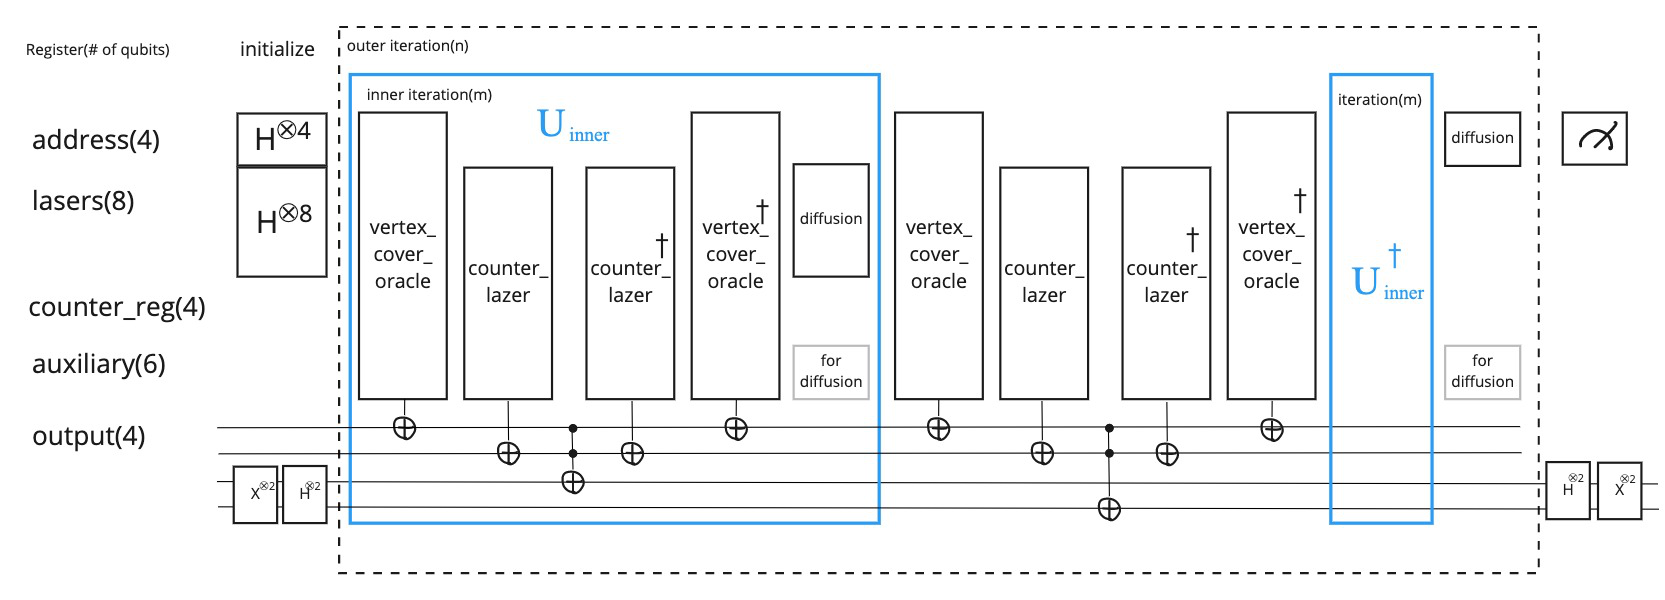

In [1]:
Image('final_circuit_1.png')

In [16]:
def week3_ans_func(problem_set):
    address = QuantumRegister(4, 'address')
    lasers = QuantumRegister(8, 'lasers')
    counter_reg = QuantumRegister(4, 'counter_reg')
    output = QuantumRegister(4, 'output')
    auxiliary = QuantumRegister(6, 'auxiliary')
    result = ClassicalRegister(4)

    qc = QuantumCircuit(address, lasers, counter_reg, output, auxiliary, result)

    # initialize address, lasers, and output registers.
    qc.h(address[:])
    qc.h(lasers[:])
    qc.x(output[2:4])
    qc.h(output[2:4])

    # Double-Grover for the vertex cover
    n = 1  # num of outer-Grover's iterations
    m = 10  # num of inner-Grover's iterations
    # Outer-Grover
    for i in range(n):
        # Inner-Grover
        for j in range(m):
            # Oracle 1. The result is stored into output[0]
            vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
            #Oracle 2. The result if stored into output[1]
            count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
            # Take AND of the results of Oracle1 and Oracle2
            qc.ccx(output[0], output[1], output[2])
            # Uncompute the registers used in calculation
            count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
            vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
            # Diffusion of inner-Grover
            diffusion(qc, lasers, auxiliary)

        # Outer Grover's oracle
        # Oracle 1. The result is stored into output[0]
        vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
        # Oracle 2. The result if stored into output[1]
        count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
        # At this time, we store the result of AND into output[3]
        qc.ccx(output[0], output[1], output[3])
        # Uncompute the registers used in calculation
        count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
        vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)

        # Apply the inverse of inner-Grover
        for j in range(m):
            # Diffusion of inner-Grover
            diffusion(qc, lasers, auxiliary)
            # Oracle 1. The result is stored into output[0]
            vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
            # Oracle 2. The result if stored into output[1]
            count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
            # Take AND of the results of Oracle and Oracle2
            qc.ccx(output[0], output[1], output[2])
            # Uncompute the registers used in calculation
            count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
            vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
        # Diffusion of outer-Grover
        diffusion(qc, address, auxiliary)

    qc.h(output[2:4])
    qc.x(output[2:4])

    qc.measure(address, result[0:4])

    return qc


grader がご使用の環境で正しく機能しない場合、`problem_set`を入力して作った関数を実行してから、`ibmq_qasm_simulator` を手動で呼び出してください。`ibmq_qasm_simulator` を手動で呼び出す方法は、このnotebookの最後に記載されています。

In [21]:
!pip install -I git+https://github.com/qiskit-community/IBMQuantumChallenge2020-Grader.git

  Cloning https://github.com/qiskit-community/IBMQuantumChallenge2020-Grader.git to /private/var/folders/vz/b1fyphrd1031ddfd1xdhjq_m0000gn/T/pip-req-build-zy6g0gw5
  Using cached numpy-1.19.4-cp38-cp38-macosx_10_9_x86_64.whl (15.3 MB)
  Using cached qiskit-0.23.1.tar.gz (4.1 kB)
  Using cached requests-2.25.0-py2.py3-none-any.whl (61 kB)
  Using cached qiskit_terra-0.16.1-cp38-cp38-macosx_10_9_x86_64.whl (7.8 MB)
  Using cached qiskit_aer-0.7.1-cp38-cp38-macosx_10_9_x86_64.whl (8.1 MB)
  Using cached qiskit_ibmq_provider-0.11.1-py3-none-any.whl (195 kB)
  Using cached qiskit_ignis-0.5.1-py3-none-any.whl (204 kB)
  Using cached qiskit_aqua-0.8.1-py3-none-any.whl (2.1 MB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.26.2-py2.py3-none-any.whl (136 kB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached dill-0.3.3-py2.py3-none-any.whl (81 kB)
  Using cached sympy-1.7-py3-n

In [17]:
from qc_grader import grade_ex3, prepare_ex3
# Execute your circuit with following prepare_ex3() function.
# The prepare_ex3() function works like the execute() function with only QuantumCircuit as an argument.
job = prepare_ex3(week3_ans_func)

Running week3_ans_func...
Computing cost...
Starting experiments. Please wait...
You may monitor the job (id: 5fd4610410ba7c001aa17103) status and proceed to grading when it successfully completes.


In [18]:
result = job.result()
counts = result.get_counts()
# The following code is just to align the execution result.
original_problem_set_counts = [(p[0][::-1], p[1]) for p in sorted(counts[0].items(), key=lambda x:x[1], reverse=True)]
original_problem_set_counts

[('1010', 379),
 ('0001', 56),
 ('0110', 48),
 ('1000', 46),
 ('1101', 46),
 ('1100', 44),
 ('1001', 44),
 ('1011', 44),
 ('1111', 44),
 ('1110', 41),
 ('0101', 39),
 ('0010', 37),
 ('0011', 36),
 ('0000', 33),
 ('0100', 33),
 ('0111', 30)]

In [19]:
grade_ex3(job)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 66630598.
The lower your score the better!
Feel free to submit your answer.


正解を見つけることに成功しました！ この回路は24量子ビットで、コストは66,630,598です。ちょっと大きいですね。

### アプローチ2：ボード上の置換行列を見つける

2番目のアプローチでは、解けないボードの特徴を使用します。Quantum Challengeで多くの参加者が気付いたように、解けないボードには特徴があり、その特徴に基づいてオラクルを作ることができます。

#### 解けないボードの性質

まず、解けないボードの性質を見てみましょう。次のボードは、3回のレーザーショットでは解けません。どうしてでしょう？重要なポイントは、ボードの対角線上のノイズクラスターです。それは、`['0', '0'], ['1', '1'], ['2', '2'], ['3', '3']`です（この議論では`['3', '0'], ['3', '1']`を無視できます）。ノイズクラスター `['0', '0']`をクリアするには、0番目の行または0番目の列でレーザービームを発射する必要があります。同様に、ノイズクラスター`['1', '1']`,をクリアするには、1行目または1列目にレーザービームを照射する必要があります。また、`['2', '2']` および`['3', '3']`の場合、2行目または2列目、および3行目または3列目のレーザービームが必要です。これら4つのノイズクラスターをクリアするためのレーザービームのオーバーラップはありません。したがって、これらをクリアするには、少なくとも4つのレーザービームが必要です。

In [20]:
unsolvable_board1 = [['0', '0'], ['1', '1'], ['2', '2'], ['3', '3'], ['3', '0'], ['3', '1']]
draw_asteroids(unsolvable_board1)

X . . . 
. X . . 
. . X . 
X X . X 


より一般的には、対角線に惑星が配置されているボードの行または列を交換してできる配置を3つのレーザービームでクリアすることは不可能です。 次の配置は、解けない配置の2つの例です。 残りの2つの惑星の配置が必須ではないことに注意してください。 残りの2つの惑星はどこにでも置くことができます。

In [21]:
unsolvable_board2 = [['0', '1'], ['1', '2'], ['2', '3'], ['3', '0']]
draw_asteroids(unsolvable_board2)
print('-------')
unsolvable_board3 = [['0', '2'], ['1', '3'], ['2', '0'], ['3', '1']]
draw_asteroids(unsolvable_board3)


. X . . 
. . X . 
. . . X 
X . . . 
-------
. . X . 
. . . X 
X . . . 
. X . . 


これらの解けない配置は、サイズ4の[置換行列](https://ja.wikipedia.org/wiki/%E7%BD%AE%E6%8F%9B%E8%A1%8C%E5%88%97)に相当します。置換行列には、各行と列に1の要素が1つだけ含まれ、残りの要素は0です。サイズ4の置換行列は 4！（24個）あります 。ボードの惑星の配置に、4！個の置換行列のうちの1つが含まれている場合、 そのボードは解けません。 したがって、このオラクルで条件をチェックしてグローバーのアルゴリズムで解けないボードを見つけることができます。

そのためのオラクルを構築しましょう。

アプローチ2では、オラクルでqRAMを使用します。qRAMでは、Xゲートの数を減らすために、このアプローチでもグレイコードの順序でボード情報をロードします。

In [30]:
def qram(qc, problem_set, address, board, auxiliary):
    gray_code_order = ['1111', '1110', '1010', '1011', '1001', '1000', '0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101']
    last = '1111'

    for k in range(16):
        cur = gray_code_order[k]
        insert_x_dif(qc, address, cur, last)
        problem = problem_set[int(cur, 2)]
        for i in range(6):
            row = int(problem[i][0])
            column = int(problem[i][1])
            target = 4 * row + column
            qc.mcx(address, board[target], auxiliary, mode='basic')
        last = cur
    insert_x_dif(qc, address, '1111', last)

オラクルでは、0から3までカウントできるミニカウンターを使用します。これは、ボード自体に2つの解けない配置（サイズ4の置換行列）が含まれている可能性があるためです。 オラクルの結果を格納するために1つの量子ビットのみを使用する場合、それらは互いに打ち消し合う可能性があります。 たとえば、次のボードには、2つの解けない配置`[['0', '0'], ['1', '1'], ['2', '2'], ['3', '3']]` と `[['0', '0'], ['1', '1'], ['2', '3'], ['3', '2']]`が含まれています。このため、ミニカウンターを使用して、ボード上の解けない配置の数をカウントします。ボードに1つ以上の解けない配置がある場合、そのボードは解けないと判断できます。

In [31]:
unsolvable_board4 = [['0', '0'], ['1', '1'], ['2', '2'], ['2', '3'], ['3', '2'], ['3', '3']]
draw_asteroids(unsolvable_board4)

X . . . 
. X . . 
. . X X 
. . X X 


In [32]:
# mini_counter to count the number of assignment of permutation matrices
def mini_counter(qc, qr):
    qc.ccx(qr[0], qr[1], qr[2])
    qc.cx(qr[0], qr[1])

def reverse_mini_counter(qc, qr):
    qc.cx(qr[0], qr[1])
    qc.ccx(qr[0], qr[1], qr[2])

次のコードのように、`itertools.permutations([0, 1, 2, 3], 4)`を使って、サイズ4の置換行列を作成できます。 インデックスは各行を表し、要素は各列を表します。 たとえば、`p = (2, 0, 3, 1)`の場合、ノイズクラスターの座標は `[['0', '2'], ['1', '0'], ['2', '3'], ['3', '1']]`です。 オラクルでは、ボード情報は`board[:]` にエンコードされ、インデックスは`4 * row + column`に対応します。 したがって、置換行列の1つを制御ビットにしたmcxゲートを適用することにより、ボードが解けるかどうかを確認できます。

In [34]:
for p in itertools.permutations([0, 1, 2, 3], 4):
    print(p)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)
(0, 2, 3, 1)
(0, 3, 1, 2)
(0, 3, 2, 1)
(1, 0, 2, 3)
(1, 0, 3, 2)
(1, 2, 0, 3)
(1, 2, 3, 0)
(1, 3, 0, 2)
(1, 3, 2, 0)
(2, 0, 1, 3)
(2, 0, 3, 1)
(2, 1, 0, 3)
(2, 1, 3, 0)
(2, 3, 0, 1)
(2, 3, 1, 0)
(3, 0, 1, 2)
(3, 0, 2, 1)
(3, 1, 0, 2)
(3, 1, 2, 0)
(3, 2, 0, 1)
(3, 2, 1, 0)


In [35]:
import itertools

def permutation_matrix_oracle(qc, board, counter_reg, output, auxiliary):
    # Check whether a board contains unsolvable assignments or not
    for p in itertools.permutations([0, 1, 2, 3], 4):
        control = []
        for i in range(4):
            control.append(board[4 * i + p[i]])     

        qc.mcx(control, counter_reg[0], auxiliary, mode='basic')
        mini_counter(qc, counter_reg)
        qc.mcx(control, counter_reg[0], auxiliary, mode='basic')
    # If the number of unsolvable assignments is 0, flip it phase
    qc.x(counter_reg[1:3])
    qc.mcx(counter_reg[1:3], output)
    # Uncompute counter_reg
    for p in itertools.permutations([0, 1, 2, 3], 4):
        control = []
        for i in range(4):
            control.append(board[4 * i + p[i]])     

        qc.mcx(control, counter_reg[0], auxiliary, mode='basic')
        reverse_mini_counter(qc, counter_reg)
        qc.mcx(control, counter_reg[0], auxiliary, mode='basic')

#### アプローチ2の量子回路

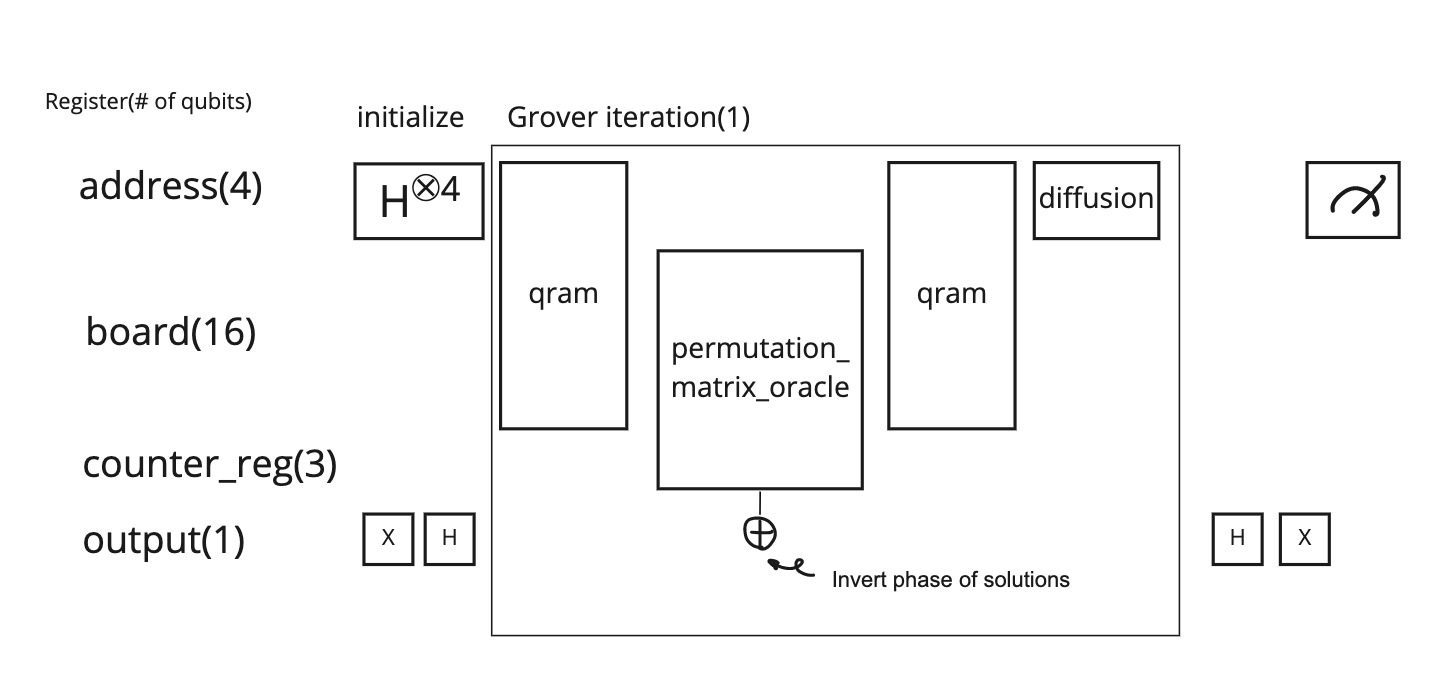

In [1]:
Image('final_circuit_2.png')

In [36]:
def week3_ans_func_2(problem_set):
    address = QuantumRegister(4, 'address')
    board = QuantumRegister(16, 'board')
    counter_reg = QuantumRegister(3, 'counter_reg')
    output = QuantumRegister(1, 'output')
    auxiliary = QuantumRegister(3, 'auxiliary')
    result = ClassicalRegister(4)

    qc = QuantumCircuit(address, board, counter_reg, output, auxiliary, result)

    #initialize
    qc.h(address[:])
    qc.x(output)
    qc.h(output)

    # Grover iteration
    for i in range(1):
        qram(qc, problem_set, address, board, auxiliary)
        permutation_matrix_oracle(qc, board, counter_reg, output, auxiliary)
        # Uncompute qram
        qram(qc, problem_set, address, board, auxiliary)
        # Call diffusion
        diffusion(qc, address, auxiliary)

    qc.h(output)
    qc.x(output)

    qc.measure(address, result)

    return qc

In [37]:
job = prepare_ex3(week3_ans_func_2)

Running week3_ans_func_2...
Computing cost...
Starting experiments. Please wait...
You may monitor the job (id: 5fd46a8880c762001a746b85) status and proceed to grading when it successfully completes.


In [38]:
result = job.result()
counts = result.get_counts()
# The following code is just to align the execution result.
original_problem_set_counts = [(p[0][::-1], p[1]) for p in sorted(counts[0].items(), key=lambda x:x[1], reverse=True)]
original_problem_set_counts

[('1010', 269),
 ('1001', 62),
 ('0010', 55),
 ('1101', 52),
 ('0000', 51),
 ('0100', 51),
 ('1111', 50),
 ('1100', 49),
 ('1000', 48),
 ('0001', 48),
 ('0111', 48),
 ('1110', 47),
 ('1011', 47),
 ('0110', 42),
 ('0011', 42),
 ('0101', 39)]

In [39]:
grade_ex3(job)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.
Your score is 65488.
The lower your score the better!
Feel free to submit your answer.


アプローチ2の回路も正解を見つけることに成功しました！ 27量子ビットで、コストは65,488です。アプローチ2のコストは、アプローチ1の66,630,598よりも大幅に小さくなっています！

### まとめ

このnotebookでは、2つのアプローチを紹介しました。 1つは、ダブル・グローバーを使用して頂点被覆を解くことに基づいており、もう1つは、ボード上の置換行列を見つけることに基づいています。 どちらのアプローチも正しく答えを見つけることができますが、コストの差はかなりあります。 アプローチ2はアプローチ1よりも優れているように見えますが、アプローチ2はアプローチ1よりも柔軟性がありません（ボードのサイズや照射できるレーザーショットの数が変わった場合は、オラクルを大幅に変更する必要があります）。

他にも、面白くて賢い解法がたくさんあります。 他のアプローチに興味がある場合は、[上位の参加者のnotebook](https://github.com/qiskit-community/IBMQuantumChallenge2020/tree/main/submissions)を参照してください。

### 付録： `imbq_qasm_simulator`および追加のサンプル問題セットを手動で呼び出す方法

次のコードを使用して`ibmq_qasm_simulator` を呼び出すことができます。 回路を`qc`に入れる必要があることに注意してください。

In [ ]:
from qiskit import IBMQ, execute

qc = "put your circuit here"

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})


In [ ]:
result = job.result()
counts = result.get_counts()
# The following code is just to align the execution result.
original_problem_set_counts = [(p[0][::-1], p[1]) for p in sorted(counts[0].items(), key=lambda x:x[1], reverse=True)]
original_problem_set_counts

`sample_problem_set`には、別の問題セットが30セット入っています。 あなたの作成した関数がこれらの問題セットで正しく機能するかどうかを確認して、楽しむことができます。

In [47]:
import json

with open('sample_problem_set.json', 'r') as f:
    sample_problem_set = json.load(f)

In [54]:
print(len(sample_problem_set))
sample_problem_set['0']

30


[[['0', '0'], ['0', '1'], ['2', '2'], ['2', '3'], ['3', '1'], ['3', '2']],
 [['0', '1'], ['1', '1'], ['1', '2'], ['2', '0'], ['3', '0'], ['3', '2']],
 [['0', '1'], ['1', '0'], ['1', '2'], ['2', '1'], ['2', '3'], ['3', '3']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['2', '1']],
 [['0', '0'], ['0', '3'], ['1', '2'], ['2', '1'], ['3', '0'], ['3', '2']],
 [['0', '0'], ['0', '3'], ['1', '0'], ['1', '2'], ['2', '3'], ['3', '2']],
 [['0', '1'], ['0', '2'], ['1', '1'], ['2', '0'], ['2', '2'], ['3', '0']],
 [['1', '2'], ['1', '3'], ['2', '0'], ['2', '1'], ['3', '0'], ['3', '3']],
 [['0', '2'], ['1', '1'], ['2', '2'], ['2', '3'], ['3', '1'], ['3', '3']],
 [['0', '3'], ['1', '2'], ['1', '3'], ['2', '1'], ['3', '1'], ['3', '2']],
 [['0', '0'], ['0', '1'], ['1', '2'], ['2', '0'], ['2', '3'], ['3', '2']],
 [['0', '0'], ['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0']],
 [['0', '0'], ['0', '2'], ['0', '3'], ['1', '3'], ['2', '2'], ['3', '0']],
 [['0', '0'], ['0', '1'],

## 講評

特に優秀な成績を収められた皆さんの実装についてコメントしておきます。

**上位3名**
* 1位 **Hironari Nagayoshi**さん: cost = $4004$<br/>　
解けないボードの性質に着目し、解説中にある24通りの解けない配置に合致するかを効率よく列挙しています。ただ列挙するだけでは28量子ビットをオーバーしてしまうので、8ボード毎に一時的に別の量子ビットに情報を保存しています。コストとは関係ありませんが、コードのシンプルさと美しさは特筆に値するので、興味がある方は提出された解答をご確認ください。


* 2位 **Adam Szady**さん: cost = $4819$<br/>
追加のアドレスQubitとC-SWAPゲートによって32のボード情報を生成することで、12通りのチェックで正解のボードを特定する斬新なアプローチを採用しています。私達はQubitの削減によるシンプルなデータ構造を追求しがちですが、QRAM空間の拡張によるオラクルのコンパクト化という柔軟な発想は参考にしたいものです。HTML (display)を用いたボードの可視化や洗練されたコードなど、量子ゲートの最適化以外にも多くの特色がある優れた解答でした。



* 3位 **Pulkit Sinha**さん: cost = $5124$<br/>
星の数が6個で盤面が4×4の時、同時に含まれる置換行列の配置の数は高々2という点に着目し、置換行列の配置が含まれている場合、Oracle operatorで-1をフェイズに掛けるのではなく、$e^{\frac 2 3 i\pi}$を掛けています。これによって置換行列が２つ含まれる場合はフェイズに$e^{\frac 4 3 i\pi}$がかかることになり、結果として$e^{\frac 2 3 i\pi}$の場合と同じ分だけ解が増幅するようになっています。また、置換行列の配置のチェックをする際に、24通りをそのままチェックするのではなく、各置換行列で共通する部分を効率よく再利用することでゲート数の削減に成功しています。

<br/><br/>
今回のコンテストは、昨年度のQuantum Challengeにつづいてグローバーのアルゴリズムのもつ可能性を探究するとともに、「そう遠くない量子の未来のためのプログラミング」と題して、今後拡張を続けていく近い将来の量子システムを念頭に、より複雑なデータ構造を実装するためのテクニックの紹介を交えた演習課題を作成しました。


そのためWeek 2以降はかなり難しく感じられたかもしれません。ジャッジのなかでは、最後まで解ききる方がどれほど出るのかと当初不安に感じておりましたが、蓋をあけてみればそれはまったくの杞憂で、２２７人もの方が無事に最後まで問題を解ききってくださいました。また、最終問題で参加者の皆さんが見せてくださった創意工夫やテクニックは実に見事でした。改めまして、おめでとうございます。


最終問題を解けることはもちろん素晴らしいことですが、我々の考えるQuantum Challengeの真の目的は、初心者の方が量子コンピューターについて学ぶ楽しさを知り、今後も継続して量子コンピューティングに親しみたいと思ってくださることです。チャレンジで出された問題と向き合い、最後まで諦めずに挑戦しつづけてくださった皆さん一人ひとりに心から感謝いたします。このチャレンジを通じて「学習体験」を楽しんでくださった方々が一人でも多くいらっしゃったのなら幸いです。


また次回のチャレンジでお会いできる日まで。

IBM Quantum Challenge ジャッジ、運営事務局一同



